In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import GPyOpt

In [135]:
# Generate a random grid in two dimensions
coordinates = np.random.randn(10000, 128)*5.0

def f(x):
    x = np.atleast_2d(x)
    mu1 = np.ones(x.shape)*5.0
    return (np.sum((x-mu1)**2, axis=1))[:,None]

f_c = f(coordinates)

In [136]:
domain = [{'name': 'stations', 'type': 'bandit', 'domain':coordinates }]

In [137]:
myBopt = GPyOpt.methods.BayesianOptimization(f=f,             
                                             domain=domain,        
                                             acquisition_type='MPI')

In [138]:
# Run the optimization
max_iter = 20     #
myBopt.run_optimization(max_iter) 

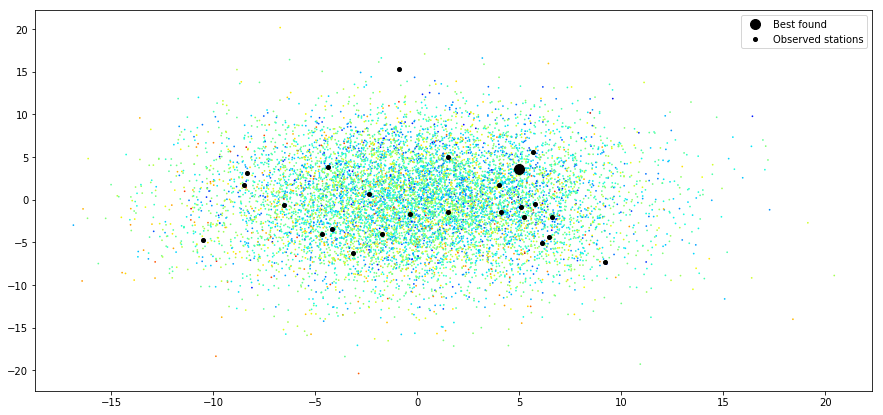

In [139]:
plt.figure(figsize=(15,7))
jet = plt.cm.get_cmap('jet')
sc = plt.scatter(coordinates[:,0],coordinates[:,1], c=f_c, cmap=jet, s=3, edgecolors='none')
plt.plot(myBopt.x_opt[0],myBopt.x_opt[1],'ko',markersize=10, label ='Best found')
plt.plot(myBopt.X[:,0],myBopt.X[:,1],'k.',markersize=8, label ='Observed stations')
plt.legend()